In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# inline display of any graphs or visualizations that we do by
%matplotlib inline

## Lets load the Boston House Pricing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
california_df = fetch_california_housing()

In [4]:
california_df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
## Lets check the description of the dataset
print(california_df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
print(california_df.data.shape)

(20640, 8)


In [7]:
# Price of the house based on the data
print(california_df.target.shape)

(20640,)


In [8]:
print(california_df.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Preparing the dataset

In [9]:
dataset = pd.DataFrame(california_df.data, columns = california_df.feature_names)

In [10]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
dataset['Price'] = california_df.target

In [12]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
## Summarizing the Stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
## Check the missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [16]:
### Exploratory Data Analysis
## Correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [17]:
# sns.pairplot(dataset)

Text(0, 0.5, 'Price')

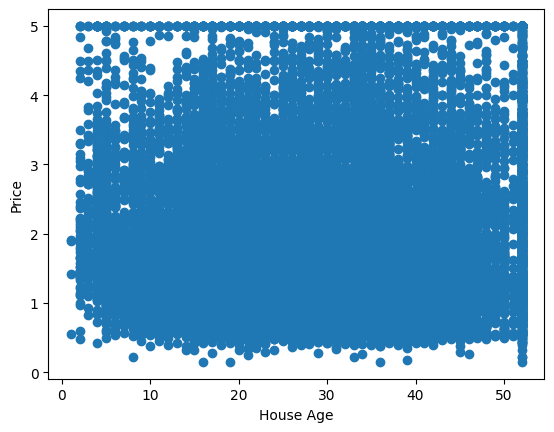

In [18]:
plt.scatter(dataset['HouseAge'],dataset['Price'])
plt.xlabel("House Age")
plt.ylabel("Price")

<Axes: xlabel='Population', ylabel='Price'>

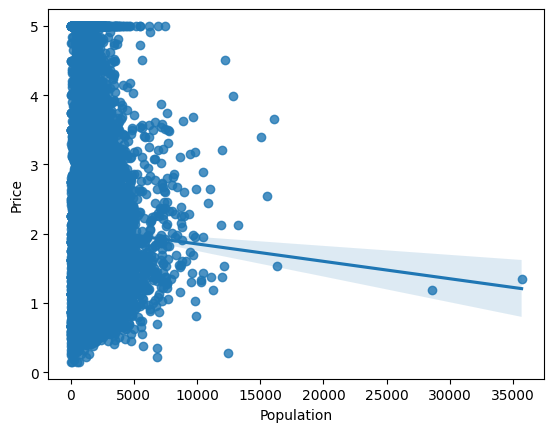

In [19]:
sns.regplot(x = "Population",y="Price",data=dataset)

In [20]:
## Independent and Dependent features
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [21]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [23]:
## Tran Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05,random_state = 42)

In [24]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

In [51]:
X_train

array([[ 0.19282165, -0.52545692, -0.37588075, ...,  0.086579  ,
         0.80581599, -1.12456025],
       [-0.15412728,  1.85507018, -0.59214738, ..., -0.06029467,
         1.01169777, -1.41379596],
       [-0.07122096, -0.68415873,  0.77212946, ..., -0.06154517,
         0.90875688,  0.41636788],
       ...,
       [-0.49241041,  0.58545572, -0.57569114, ...,  0.02388636,
        -0.75233481,  0.59589349],
       [ 0.97908423, -1.08091325,  0.38433264, ...,  0.00950899,
         0.90875688, -1.18938895],
       [-0.68205398,  1.85507018, -0.80851589, ..., -0.09094045,
         0.99766038, -1.41878278]])

In [75]:
import pickle
pickle.dump(scaler, open('scaling.pkl','wb'))

In [52]:
X_test

array([[-1.15460413, -0.28740421, -0.49379035, ...,  0.07507516,
         0.19752889,  0.28172368],
       [-0.70540936,  0.1093503 , -0.15612317, ..., -0.03733662,
        -0.23295121,  0.05731667],
       [-0.20406129,  1.85507018, -0.57950255, ..., -0.16118247,
         1.01169777, -1.42875642],
       ...,
       [-0.5237975 ,  0.82350843, -0.62399526, ..., -0.06694891,
        -0.72893915,  0.64576172],
       [ 1.72571663,  0.50610482,  0.91164823, ...,  0.01284851,
        -0.68682697,  0.50613069],
       [ 1.61200446,  0.74415753,  0.58177207, ..., -0.04677522,
         1.04445169, -1.29411222]])

## Model Training

In [53]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [54]:
regression.fit(X_train,y_train)

LinearRegression()

In [55]:
## print the coefficients and intercept
print(regression.coef_)

[ 0.83061541  0.1198903  -0.27264797  0.31274456 -0.00446652 -0.03948344
 -0.89862976 -0.86754288]


In [56]:
print(regression.intercept_)

2.066686511117916


In [57]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [58]:
## Prediction with Test Data
reg_pred = regression.predict(X_test)

In [59]:
reg_pred

array([0.73423084, 1.75879944, 2.67167675, ..., 1.99432375, 3.4339538 ,
       3.44150157])

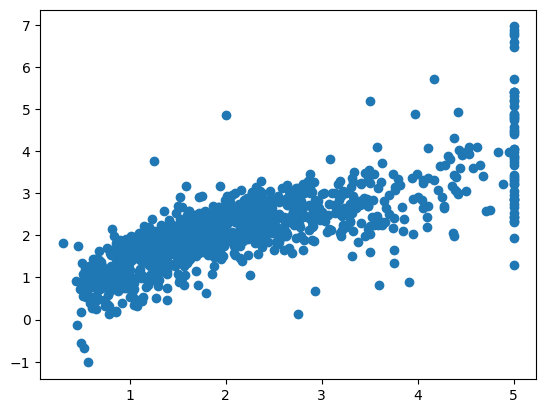

In [60]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [61]:
## Residuals
residuals = y_test-reg_pred

In [62]:
residuals

20046   -0.257231
3024    -1.300799
15663    2.328333
20484   -0.660259
9814     0.166504
           ...   
3615    -0.607399
8010    -0.533370
4400     0.140676
4034     1.566056
1632     0.938498
Name: Price, Length: 1032, dtype: float64

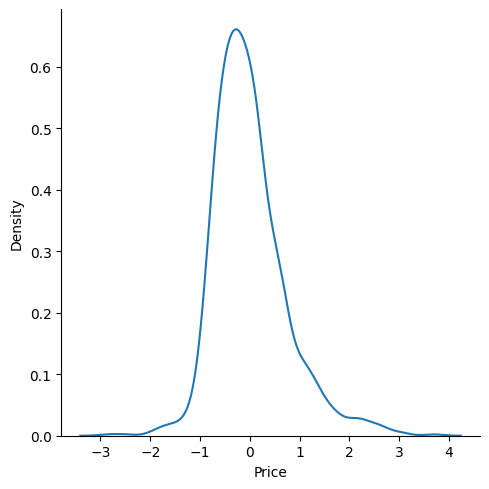

In [63]:
## Plot this residuals
sns.displot(residuals,kind="kde")

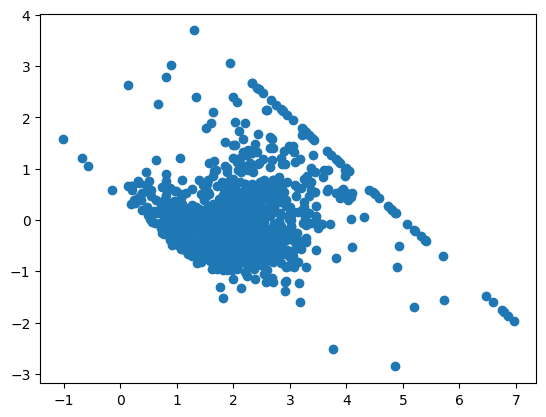

In [64]:
## Scatter plot with respect to prediction and residuals
plt.scatter(reg_pred,residuals)

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.540468839071489
0.5326365529244789
0.729819534490876


## R square and adjusted R square

In [66]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.6076680580298526


In [67]:
1 - (1-score) * (len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)

0.6045999685520802

# New Data Prediction

In [68]:
## This is how we have to give the entire data set for model prediction
california_df.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [69]:
## transformation of new data
scaler.transform(california_df.data[0].reshape(1,-1))

/home/yogesharyal/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.35610053,  0.98221024,  0.61900573, -0.15306326, -0.97067332,
        -0.04899779,  1.04913082, -1.32403315]])

In [70]:
regression.predict(scaler.transform(california_df.data[0].reshape(1,-1)))

/home/yogesharyal/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.13696252])

# Pickling The Model file For Deployment

In [71]:
import pickle

In [72]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [73]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [74]:
## Prediction
pickled_model.predict(scaler.transform(california_df.data[0].reshape(1,-1)))

/home/yogesharyal/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.13696252])